In [35]:
import pandas as pd
import numpy as np
# from sklearn.preprocessing import OneHotEncoder
# import time
import warnings
warnings.filterwarnings('ignore')

# enc = OneHotEncoder()
path = 'data/'
train = pd.read_csv(path+'train.csv')
vali = pd.read_csv(path+'validation.csv')
test = pd.read_csv(path+'test.csv')
# start_time = time.time()

In [36]:
# train_onehot = pd.read_csv('train_onehot.csv')
vali_onehot = pd.read_csv('vali_onehot.csv')

In [37]:
list(vali_onehot.head())

['weekday_0',
 'weekday_1',
 'weekday_2',
 'weekday_3',
 'weekday_4',
 'weekday_5',
 'weekday_6',
 'hour_0',
 'hour_1',
 'hour_10',
 'hour_11',
 'hour_12',
 'hour_13',
 'hour_14',
 'hour_15',
 'hour_16',
 'hour_17',
 'hour_18',
 'hour_19',
 'hour_2',
 'hour_20',
 'hour_21',
 'hour_22',
 'hour_23',
 'hour_3',
 'hour_4',
 'hour_5',
 'hour_6',
 'hour_7',
 'hour_8',
 'hour_9',
 'logtype_1',
 'region_0',
 'region_1',
 'region_106',
 'region_124',
 'region_134',
 'region_146',
 'region_15',
 'region_164',
 'region_183',
 'region_2',
 'region_201',
 'region_216',
 'region_238',
 'region_253',
 'region_27',
 'region_275',
 'region_276',
 'region_298',
 'region_3',
 'region_308',
 'region_325',
 'region_333',
 'region_344',
 'region_359',
 'region_368',
 'region_374',
 'region_393',
 'region_394',
 'region_395',
 'region_40',
 'region_55',
 'region_65',
 'region_79',
 'region_80',
 'region_94',
 'adexchange_1',
 'adexchange_2',
 'adexchange_3',
 'adexchange_4',
 'adexchange_null',
 'slotvisibil

In [38]:
ad_ctr = []
ad_name = [1458,3476,3427,3358,2259,2821,3386,2997,2261]
for i in ad_name:
    ad_ctr.append(train['click'][train['advertiser']==i].value_counts(normalize = True)[1])
ad_len = len(ad_name)
ad_ctr

[0.00083473226564105031,
 0.00050464562342478474,
 0.00074884754565216914,
 0.00076448084204447765,
 0.00030658545558598702,
 0.00062225602378400803,
 0.0007180766777520589,
 0.0046066034099877034,
 0.00030675100937663219]

In [39]:
def dataprocessing (data,data_onehot):
    slotprice = data['slotprice']
    bidprice = data['bidprice']
    payprice = data['payprice']
    click = data['click']
    
    ad_onehot = []
    
    ad_onehot = []
    for i in ad_name:
        ad_onehot.append(data_onehot[data_onehot["advertiser_"+str(i)]==1]) 
    
    ad_click = []
    for i in ad_name:
        ad_click.append(data['click'][data['advertiser']==i])
        
    return ad_onehot, ad_click, slotprice, bidprice, payprice

In [40]:
# train_ad_onehot,train_ad_click,train_slotprice,train_bidprice,train_payprice = dataprocessing(train,train_onehot)
vali_ad_onehot,vali_ad_click,vali_slotprice,vali_bidprice,vali_payprice = dataprocessing(vali,vali_onehot)

In [41]:
from sklearn.metrics import mean_squared_error
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))
from sklearn.metrics import roc_auc_score as auc

In [42]:
xgb_result =[]
rf_result =[]
rf_bag_result = []
etc_result = []
etc_bag_result = []
gbc_result = []
gbc_bag_result =[]
adb_result = []
adb_bag_result = []
lasso_result = []
ridge_result = []
et_result = []

In [43]:
#load files
import pickle
files = ['xgb_result','rf_result','rf_bag_result','etc_result','etc_bag_result','gbc_result','gbc_bag_result','adb_result','adb_bag_result','Lasso','ridge','et']
result_list = [xgb_result,rf_result,rf_bag_result,etc_result,etc_bag_result,gbc_result,gbc_bag_result,adb_result,adb_bag_result,lasso_result,ridge_result,et_result]
name = ['XGBoost', 'Random Forest Classifier', 'RF bagging', 'Extra Tree Classifier','ETC bagging','Gradient Boosting Classifier', 'GBC bagging','Adaboosting','ADB bagging', 'Lasso','Ridge Regression', 'ElasticNet']
j = 0
for i in files:
#     with open(i+".txt", "rb") as fp:   # Unpickling
#         result_list[j] = pickle.load(fp)
#         j+=1
    result_list[j] = pickle.load(open(i+'.txt', 'rb'))
    print(i)
    j+=1
   

xgb_result
rf_result
rf_bag_result
etc_result
etc_bag_result
gbc_result
gbc_bag_result
adb_result
adb_bag_result
Lasso
ridge
et


In [44]:
#compare auc and rmse for each ads
#create a list of auc and rmse
ads_auc = []
ads_rmse = []
for i in range(ad_len):
    inter_auc = []
    inter_rmse = []
    for j in range(len(files)):
        inter_auc.append(result_list[j][1][i])
        inter_rmse.append(result_list[j][2][i])
    ads_auc.append(inter_auc)
    ads_rmse.append(inter_rmse)


In [45]:
#find best
for i in range(ad_len):
    print('for the',i,'ads')
    print('the best rmse is model',files[ads_rmse[i].index(min(ads_rmse[i]))],'rmse is',min(ads_rmse[i]),'auc is',ads_auc[i][ads_rmse[i].index(min(ads_rmse[i]))])
    print('the best auc is model',files[ads_auc[i].index(max(ads_auc[i]))],'auc is',max(ads_auc[i]),'rmse is',ads_rmse[i][ads_auc[i].index(max(ads_auc[i]))])

for the 0 ads
the best rmse is model xgb_result rmse is 0.0218420981693 auc is 0.966008170071
the best auc is model xgb_result auc is 0.966008170071 rmse is 0.0218420981693
for the 1 ads
the best rmse is model rf_result rmse is 0.0180653417045 auc is 0.804952272268
the best auc is model rf_result auc is 0.804952272268 rmse is 0.0180653417045
for the 2 ads
the best rmse is model xgb_result rmse is 0.0245907426539 auc is 0.970605310094
the best auc is model xgb_result auc is 0.970605310094 rmse is 0.0245907426539
for the 3 ads
the best rmse is model xgb_result rmse is 0.0227024799446 auc is 0.926340903666
the best auc is model xgb_result auc is 0.926340903666 rmse is 0.0227024799446
for the 4 ads
the best rmse is model et rmse is 0.0258758508431 auc is 0.625645472275
the best auc is model Lasso auc is 0.644292141306 rmse is 0.0258764216646
for the 5 ads
the best rmse is model Lasso rmse is 0.0249758353338 auc is 0.585621535369
the best auc is model gbc_bag_result auc is 0.674527150999 rm

In [46]:
# combine the best models by look into the result of last cell
# xgb xgb xgb gbc lasso rf rf xgb lasso
no = [ 0, 0, 0, 5, 9, 1, 1, 0, 9]
combine_modle = []
j = 0
for i in no:
    combine_modle.append(result_list[i][0][j])
    j+=1

In [47]:
len(combine_modle)

9

In [48]:
for i in range(ad_len):
        print('ads',i,'rmse',rmse(vali_ad_click[i],combine_modle[i]),'auc',auc(vali_ad_click[i],combine_modle[i]))

ads 0 rmse 0.0218420981693 auc 0.966008170071
ads 1 rmse 0.0184966660166 auc 0.797117514433
ads 2 rmse 0.0245907426539 auc 0.970605310094
ads 3 rmse 0.0237282904513 auc 0.920677388202
ads 4 rmse 0.0258764216646 auc 0.644292141306
ads 5 rmse 0.0250807669506 auc 0.558995110478
ads 6 rmse 0.0245902394732 auc 0.724251378422
ads 7 rmse 0.0654375197595 auc 0.701964688108
ads 8 rmse 0.0193342687271 auc 0.773310886644


In [49]:
# merge the combine model to pctr dataframe
ad_pctr = vali_ad_onehot
j = 0
for i in ad_name:
    ad_pctr[j]['pctr'] = combine_modle[j]
    ad_pctr[j]['ad'] = i
    ad_pctr[j] = ad_pctr[j][['pctr','ad']]
    j+=1
combine_pctr = (pd.concat(ad_pctr)).sort_index()

In [50]:
sum(combine_pctr['pctr'])/len(combine_pctr)

0.00081574728337216386

In [51]:
rmse(vali['click'],combine_pctr['pctr'])

0.024693648413586591

In [52]:
auc(vali['click'],combine_pctr['pctr'])

0.88047827904775666

In [53]:
combine_pctr.to_csv('model_combine.csv', index = False)

In [54]:
# merge the single model
def ad_to_total (ad_onehot,ad_pd):
    ad_pctr = ad_onehot
    j = 0
    for i in ad_name:
        ad_pctr[j]['pctr'] = ad_pd[j]
        ad_pctr[j]['ad'] = i
        ad_pctr[j] = ad_pctr[j][['pctr','ad']]
        j+=1
    pctr = (pd.concat(ad_pctr)).sort_index()
    return pctr

In [55]:
xgb_pctr = []
rf_pctr = []
rf_bag_pctr = []
etc_pctr = []
etc_bag_pctr = []
gbc_pctr = []
gbc_bag_pctr = []
adb_pctr = []
adb_bag_pctr = []
lasso_pctr = []
ridge_pctr = []
et_pctr = []
models_pctr = [xgb_pctr,rf_pctr,rf_bag_pctr,etc_pctr,etc_bag_pctr,gbc_pctr,gbc_bag_pctr,adb_pctr,adb_bag_pctr,lasso_pctr, ridge_pctr, et_pctr]

for i in range(len(models_pctr)):
    models_pctr[i] = ad_to_total(vali_ad_onehot, result_list[i][0])

In [56]:
# files = ['xgb_result','rf_result','rf_bag_result','etc_result','etc_bag_result','gbc_result','gbc_bag_result','adb_result','adb_bag_result']
for i in range(len(files)):
    print('model',files[i],'rmse',rmse(vali['click'],models_pctr[i]['pctr']),'auc',auc(vali['click'],models_pctr[i]['pctr']))

model xgb_result rmse 0.024593457745 auc 0.875464104445
model rf_result rmse 0.0261000363125 auc 0.830770556453
model rf_bag_result rmse 0.0258163151843 auc 0.833167915452
model etc_result rmse 0.0258470575015 auc 0.836967740359
model etc_bag_result rmse 0.0259917138062 auc 0.833142971661
model gbc_result rmse 0.0266023578917 auc 0.751412651721
model gbc_bag_result rmse 0.0264338955763 auc 0.821180359663
model adb_result rmse 0.0261000363125 auc 0.830770556453
model adb_bag_result rmse 0.371819736921 auc 0.700731811072
model Lasso rmse 0.0264605869328 auc 0.824695912519
model ridge rmse 0.0264287293825 auc 0.825319330006
model et rmse 0.0264288489879 auc 0.828131714677


In [57]:
for i in range(len(files)):
    print(name[i],'&',rmse(vali['click'],models_pctr[i]['pctr']),'&',auc(vali['click'],models_pctr[i]['pctr']),'\\\\')

XGBoost & 0.024593457745 & 0.875464104445 \\
Random Forest Classifier & 0.0261000363125 & 0.830770556453 \\
RF bagging & 0.0258163151843 & 0.833167915452 \\
Extra Tree Classifier & 0.0258470575015 & 0.836967740359 \\
ETC bagging & 0.0259917138062 & 0.833142971661 \\
Gradient Boosting Classifier & 0.0266023578917 & 0.751412651721 \\
GBC bagging & 0.0264338955763 & 0.821180359663 \\
Adaboosting & 0.0261000363125 & 0.830770556453 \\
ADB bagging & 0.371819736921 & 0.700731811072 \\
Lasso & 0.0264605869328 & 0.824695912519 \\
Ridge Regression & 0.0264287293825 & 0.825319330006 \\
ElasticNet & 0.0264288489879 & 0.828131714677 \\


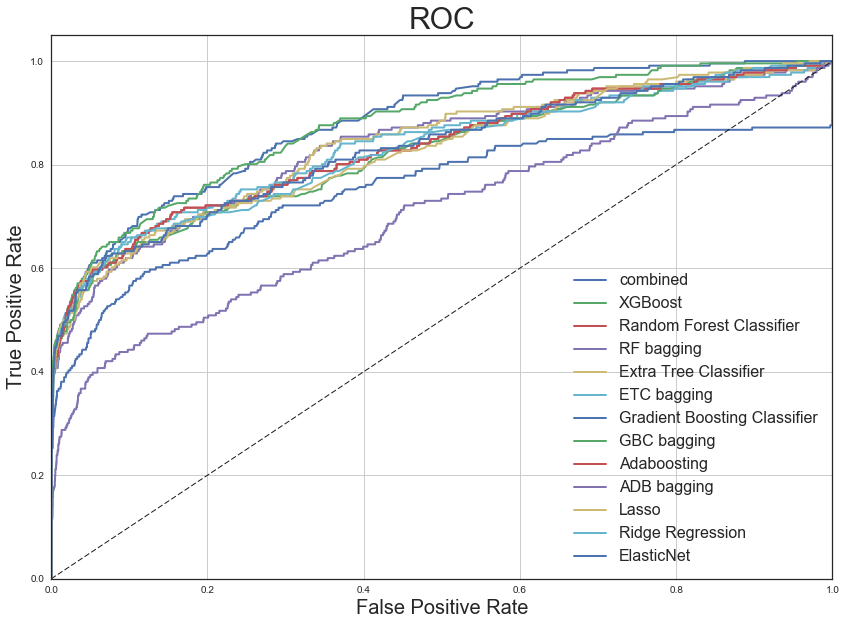

In [58]:
import matplotlib.pyplot as plt
from cycler import cycler
import seaborn as sns
from sklearn import metrics
sns.set(style="white", color_codes=True)
from sklearn.metrics import roc_curve
plt.figure(figsize=(14,10))


fpr, tpr, thresholds = roc_curve(vali['click'], combine_pctr['pctr'])
lab = 'AUC=%.5f' % metrics.auc(fpr, tpr)
# axes.step(fpr, tpr, lw=2,label=lab)
plt.plot(fpr, tpr,label='combined',linewidth=2)


for i in range(len(name)):
    fpr, tpr, thresholds = roc_curve(vali['click'], models_pctr[i]['pctr'])
    lab = 'AUC=%.5f' % metrics.auc(fpr, tpr)
    # axes.step(fpr, tpr, lw=2,label=lab)
    plt.plot(fpr, tpr,label=name[i],linewidth=2)

# axes.legend(loc='lower right', fontsize='small')
plt.xlabel('False Positive Rate',fontsize=20)  
plt.ylabel('True Positive Rate',fontsize=20) 
plt.title('ROC',fontsize=30) 
plt.grid(True)
plt.legend(loc="lower right",prop={'size':16})
plt.plot([0, 1], [0, 1], 'k--', lw=1) 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05])

plt.show()

# bid

In [59]:
import random
random.seed(10)

In [121]:
def const(bid):
    price = bid
    return price

def rand(upper):
    price = int(random.random() * upper)
    return price

def mcpc(ecpc, pctr):
    price = int(ecpc * pctr)
    return price

def lin(pctr, basectr, basebid):
    price = int(pctr/ basectr *basebid)
    return price

def sq(pctr, basectr, basebid):
    price = int(pctr/basectr)*(pctr/basectr) *basebid)
    return price

import math
def epower(pctr, basectr, basebid):
    a = (pctr-basectr)
    try:
        price = int(((math.exp(a)-1)*1200/2)*basebid)
#         print((math.exp(a)-1))
    except OverflowError:
        price = int(100)
    return price
    
def win( payprice, price):
    result = (price>payprice)
    return result

## test on validation set

In [24]:
vali_click = vali['click']

In [25]:
sum(vali_click)

226

In [82]:
def biding (model,base_bid,bid_vali):
    valilin_bidwin = []
    c_sum = 0
    lin_bidwin = 0
    budget = 6250000
    cost = 0
    for index in range(len(bid_vali)):
        pclick = bid_vali.iloc[index][0]
        adid = bid_vali.iloc[index][1]
        slotprice = vali_slotprice.iloc[index]
        bidprice = vali_bidprice.iloc[index]
        payprice = vali_payprice.iloc[index]
        click = vali_click.iloc[index]

        basectr = ad_ctr[ad_name.index(adid)]
        price = model(pclick, basectr, base_bid)
        result = win( payprice, price)

        if result and budget-payprice>0:
            detail = []
            budget = budget-payprice
            detail = [index,adid,click,pclick]
            valilin_bidwin.append(detail)
            cost = cost + payprice

        if budget<1:
            break

        pctr = 0
        slotprice = 0
        bidprice = 0

    c_sum = 0
    for i in range(len(valilin_bidwin)):
        c_sum = valilin_bidwin[i][2]+c_sum
    if valilin_bidwin == 0 and c_sum ==0:
        ctr = 0
        cpm = 0
        cpc = 0
    else: 
        ctr = c_sum/len(valilin_bidwin)
        cpm = cost/len(valilin_bidwin)* 1000
        cpc = cost/c_sum
    
    #'impression','clicks','ctr','cpm','cpc'
    return len(valilin_bidwin), c_sum, ctr, cpm, cpc, cost

In [73]:
#find best result of linear biding
lin_bid_result = []
for i in range(129,140):
    base_bid = i
    pctr = combine_pctr
    lin_winbid,lin_click,lin_ctr,cpm,cpc,lin_cost = biding (lin,base_bid,pctr)
    lin_bid_result.append([lin_winbid,lin_click,lin_ctr,cpm,cpc,lin_cost])
    print('impressions',lin_winbid,'clicks',lin_click,'ctr',lin_ctr,'cpm', cpm, 'cpc', cpc, 'cost',lin_cost,'basebid',base_bid)

impressions 121241 clicks 177 ctr 0.00145990217831 cpm 49445.3773888 cpc 33868.9661017 cost 5994807 basebid 129
impressions 121748 clicks 177 ctr 0.00145382265006 cpm 49567.1797483 cpc 34094.3785311 cost 6034705 basebid 130
impressions 122437 clicks 179 ctr 0.00146197636335 cpm 49714.2693794 cpc 34004.8379888 cost 6086866 basebid 131
impressions 123052 clicks 179 ctr 0.00145466957059 cpm 49775.5989338 cpc 34217.8044693 cost 6124987 basebid 132
impressions 123564 clicks 179 ctr 0.00144864199929 cpm 49932.6260076 cpc 34468.575419 cost 6169875 basebid 133
impressions 124158 clicks 179 ctr 0.00144171136777 cpm 50219.0193141 cpc 34832.9217877 cost 6235093 basebid 134
impressions 124135 clicks 178 ctr 0.0014339227454 cpm 50348.4029484 cpc 35112.3539326 cost 6249999 basebid 135
impressions 123795 clicks 174 ctr 0.00140554949715 cpm 50486.6836302 cpc 35919.5344828 cost 6249999 basebid 136
impressions 123502 clicks 173 ctr 0.00140078703179 cpm 50606.4598144 cpc 36127.1618497 cost 6249999 basebi

In [74]:
#find the best result of the combine model
sq_bid_result = []
for i in range(72000,79000,1000):
    base_bid = i
    pctr = combine_pctr
    lin_winbid,lin_click,lin_ctr,cpm,cpc,lin_cost = biding (sq,base_bid,pctr)
    sq_bid_result.append([lin_winbid,lin_click,lin_ctr,cpm,cpc,lin_cost])
    print('impressions',lin_winbid,'clicks',lin_click,'ctr',lin_ctr,'cpm', cpm, 'cpc', cpc, 'cost',lin_cost,'basebid',base_bid)

impressions 102072 clicks 183 ctr 0.0017928521044 cpm 59494.2099694 cpc 33184.1147541 cost 6072693 basebid 72000
impressions 102967 clicks 183 ctr 0.00177726844523 cpm 59590.0045646 cpc 33528.9836066 cost 6135804 basebid 73000
impressions 103565 clicks 183 ctr 0.00176700622797 cpm 59679.2159513 cpc 33774.1967213 cost 6180678 basebid 74000
impressions 104191 clicks 183 ctr 0.00175638970736 cpm 59887.7446229 cpc 34097.0710383 cost 6239764 basebid 75000
impressions 104224 clicks 182 ctr 0.00174623887013 cpm 59966.9845717 cpc 34340.6538462 cost 6249999 basebid 76000
impressions 104088 clicks 179 ctr 0.00171969871647 cpm 60045.3366382 cpc 34916.1955307 cost 6249999 basebid 77000
impressions 103950 clicks 176 ctr 0.00169312169312 cpm 60125.0505051 cpc 35511.3579545 cost 6249999 basebid 78000


In [122]:
# exponential function 
epower_bid_result = []
for i in (10,100,1000,10000,100000,1000000,10000000,100000000,1000000000,10000000000):
    base_bid = i
    pctr = combine_pctr
    lin_winbid,lin_click,lin_ctr,cpm,cpc,lin_cost = biding (epower,base_bid,pctr)
    epower_bid_result.append([lin_winbid,lin_click,lin_ctr,cpm,cpc,lin_cost])
    print('impressions',lin_winbid,'clicks',lin_click,'ctr',lin_ctr,'cpm', cpm, 'cpc', cpc, 'cost',lin_cost,'basebid',base_bid)

impressions 1852 clicks 93 ctr 0.0502159827214 cpm 43723.5421166 cpc 870.709677419 cost 80976 basebid 10
impressions 10237 clicks 116 ctr 0.0113314447592 cpm 53899.7753248 cpc 4756.65517241 cost 551772 basebid 100
impressions 32362 clicks 140 ctr 0.00432606143007 cpm 76826.4322353 cpc 17758.9785714 cost 2486257 basebid 1000
impressions 44772 clicks 154 ctr 0.00343964978111 cpm 89297.5073707 cpc 25961.2207792 cost 3998028 basebid 10000
impressions 47697 clicks 157 ctr 0.00329161163176 cpm 91897.6665199 cpc 27918.7452229 cost 4383243 basebid 100000
impressions 49080 clicks 157 ctr 0.0031988590057 cpm 90862.6935615 cpc 28404.7197452 cost 4459541 basebid 1000000
impressions 49795 clicks 157 ctr 0.0031529270007 cpm 92186.1030224 cpc 29238.2611465 cost 4590407 basebid 10000000
impressions 49795 clicks 157 ctr 0.0031529270007 cpm 92186.1030224 cpc 29238.2611465 cost 4590407 basebid 100000000
impressions 49795 clicks 157 ctr 0.0031529270007 cpm 92186.1030224 cpc 29238.2611465 cost 4590407 base

In [87]:
#find best result of the models
models_bid_result = []
for i in range(len(files)):
    print('model',files[i])
    model_bid = []
    for j in range(100,150,10):
        base_bid = j
        pctr = models_pctr[i]
        lin_winbid,lin_click,lin_ctr,cpm,cpc,lin_cost = biding (lin,base_bid,pctr)
        model_bid.append([lin_winbid,lin_click,lin_ctr,cpm,cpc,lin_cost])
        print('impressions',lin_winbid,'clicks',lin_click,'ctr',lin_ctr,'cpm', cpm, 'cpc', cpc, 'cost',lin_cost,'basebid',base_bid)
    models_bid_result.append(model_bid)

model xgb_result
impressions 99178 clicks 155 ctr 0.00156284659904 cpm 47489.0903225 cpc 30386.2774194 cost 4709873 basebid 100
impressions 106099 clicks 162 ctr 0.00152687584237 cpm 49004.8633823 cpc 32094.8580247 cost 5199367 basebid 110
impressions 112729 clicks 165 ctr 0.00146368724995 cpm 50140.4962343 cpc 34256.2909091 cost 5652288 basebid 120
impressions 118677 clicks 170 ctr 0.00143245953302 cpm 51454.2834753 cpc 35920.2352941 cost 6106440 basebid 130
impressions 119079 clicks 161 ctr 0.00135204360131 cpm 52486.1562492 cpc 38819.8695652 cost 6249999 basebid 140
model rf_result
impressions 101962 clicks 160 ctr 0.00156921205939 cpm 45722.9261882 cpc 29137.50625 cost 4662001 basebid 100
impressions 110540 clicks 162 ctr 0.00146553283879 cpm 47240.4921295 cpc 32234.345679 cost 5221964 basebid 110
impressions 118591 clicks 165 ctr 0.0013913366107 cpm 48651.5587186 cpc 34967.4969697 cost 5769637 basebid 120
impressions 125353 clicks 166 ctr 0.00132426028894 cpm 49859.1896484 cpc 376

In [ ]:
models_bid_result.

In [88]:
final_final_result = []
for i in [158,300]:#124,158from best constant bid
    final_result = []
    for n in np.linspace(0.85,1.098,30):
        gate_bidwin = []
        bidwin = []
        budget = 6500*1000
        cost = 0
        bid_vali = combine_pctr
        for index in range(len(vali)):
            adid = bid_vali.iloc[index][1]
            bidid = vali.bidid[index]
            slotprice = vali.slotprice[index]
            bidprice = vali.bidprice[index]
            payprice = vali.payprice[index]
            click = vali.click[index]
            basectr = ad_ctr[ad_name.index(adid)]
            pclick = bid_vali.iloc[index][0]

            if (pclick/ basectr) >= n:
                price = const(i)
            else:
                price=const(2)

            result = win(payprice, price)

            if result and budget-payprice>0:
                detail = []
                budget = budget-payprice
                #index, adid, click, pclick
                detail = [index,bidid,click]
                gate_bidwin.append(detail)
                cost = cost + payprice
            if budget<1:
                break

            slotprice = 0
            bidprice = 0

        c_sum = 0
        for k in range(len(gate_bidwin)):
            c_sum = gate_bidwin[k][2]+c_sum
        if len(gate_bidwin) ==0:
            ctr=0
        else:
            ctr=c_sum/len(gate_bidwin)
            cpm = cost/len(gate_bidwin)* 1000
            cpc = cost/c_sum
        if ctr == 0:
            cpc = 0
        detail2 = [i,len(gate_bidwin),c_sum,ctr,cpm,cpc]
        final_result.append(detail2)
        print('norm: ',n,'num of win: ',len(gate_bidwin),'num of click: ',c_sum,'ctr: ',ctr,'cpm: ',cpm,'cpc: ',cpc)
    final_final_result.append(final_result)

norm:  0.85 num of win:  53720 num of click:  130 ctr:  0.0024199553239 cpm:  60999.4601638 cpc:  25206.8538462
norm:  0.858551724138 num of win:  53343 num of click:  130 ctr:  0.00243705828319 cpm:  60998.9689369 cpc:  25029.7538462
norm:  0.867103448276 num of win:  51608 num of click:  130 ctr:  0.00251898930398 cpm:  61242.8305689 cpc:  24312.4615385
norm:  0.875655172414 num of win:  51351 num of click:  130 ctr:  0.00253159626882 cpm:  61271.2702771 cpc:  24202.6230769
norm:  0.884206896552 num of win:  51098 num of click:  130 ctr:  0.00254413088575 cpm:  61266.3705037 cpc:  24081.4538462
norm:  0.89275862069 num of win:  50841 num of click:  130 ctr:  0.00255699140458 cpm:  61270.2936606 cpc:  23961.8692308
norm:  0.901310344828 num of win:  45688 num of click:  125 ctr:  0.0027359481702 cpm:  61210.3396953 cpc:  22372.624
norm:  0.909862068966 num of win:  45257 num of click:  124 ctr:  0.0027399076386 cpm:  61229.2684005 cpc:  22347.2016129
norm:  0.918413793103 num of win: 

In [91]:
len(final_final_result)

2

In [92]:
gate_result = pd.DataFrame(final_final_result[1])
gate_result.columns = ['norm', 'impression','clicks','ctr','cpm','cpc']

In [93]:
gate_result.to_csv('gate_bidding.csv', index = False)